In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14) # rc stand for something like run config
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white") #seaborn is package for visualization
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_sas("~/Documents/fall2019/5753/enrollment_data.sas7bdat",format='sas7bdat', encoding = 'latin-1')
data.describe()

,avg_income,CAMPUS_VISIT,distance,hscrat,init_span,int1rat,int2rat,interest,mailq,premiere,REFERRAL_CNTCTS,satscore,SELF_INIT_CNTCTS,sex,SOLICITED_CNTCTS,telecq,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS
count,4397.000000,5160.000000,4489.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,5160.000000,3273.000000,5160.000000,5033.000000,5160.000000,2105.000000,5160.000000,5160.000000
mean,53494.747100,0.150194,318.016140,0.088590,19.215891,0.045520,0.051802,0.172093,3.893798,0.212984,0.064147,1149.364497,3.335659,0.617524,0.582946,2.141568,4.429651,0.446899
std,23083.609393,0.374771,370.781848,0.145744,9.177806,0.035887,0.039164,0.411876,1.600167,0.409456,0.288625,151.491442,3.098895,0.486040,0.761358,0.807467,3.480081,0.670228
min,9783.000000,0.000000,0.790555,0.000000,-216.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,440.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,35568.000000,0.000000,102.461358,0.023529,12.000000,0.020906,0.020380,0.000000,2.000000,0.000000,0.000000,1050.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000
50%,48627.000000,0.000000,160.271705,0.052632,18.000000,0.049270,0.056670,0.000000,5.000000,0.000000,0.000000,1150.000000,3.000000,1.000000,0.000000,2.000000,3.000000,0.000000
75%,68458.000000,0.000000,372.547430,0.095238,23.000000,0.049270,0.056670,0.000000,5.000000,0.000000,0.000000,1250.000000,5.000000,1.000000,1.000000,2.000000,7.000000,1.000000
max,200001.000000,2.000000,3882.192379,1.000000,72.000000,1.000000,1.000000,3.000000,5.000000,1.000000,5.000000,1600.000000,21.000000,1.000000,9.000000,4.000000,28.000000,5.000000


In [3]:
print(data.columns.values)

['avg_income' 'CAMPUS_VISIT' 'CONTACT_CODE1' 'Contact_Date'
 'Contact_Month' 'Contact_Year' 'distance' 'Target_Enroll' 'ETHNICITY'
 'hscrat' 'ID' 'init_span' 'Instate' 'int1rat' 'int2rat' 'interest'
 'IRSCHOOL' 'LEVEL_YEAR' 'mailq' 'premiere' 'REFERRAL_CNTCTS' 'satscore'
 'SELF_INIT_CNTCTS' 'sex' 'SOLICITED_CNTCTS' 'telecq' 'TERRITORY'
 'TOTAL_CONTACTS' 'TRAVEL_INIT_CNTCTS']


# descriptive analysis
nominal data_drop: 
'Contact_Date'
'Contact_Month' 'Contact_Year' 
get dummy:
instate premiere  sex 

In [26]:
data['LEVEL_YEAR'].value_counts()

FR04    5160
Name: LEVEL_YEAR, dtype: int64

In [13]:
data = data.drop(['IRSCHOOL'], axis = 1)

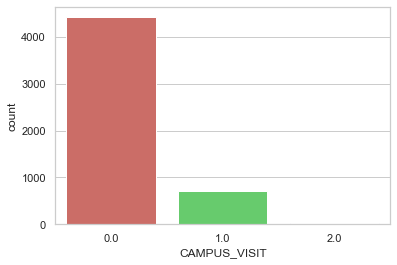

In [14]:
sns.countplot(x='CAMPUS_VISIT', data = data, palette = 'hls')

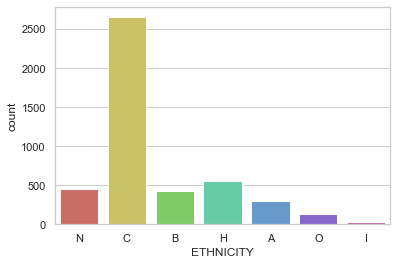

In [20]:
sns.countplot(x='ETHNICITY', data = data, palette = 'hls')

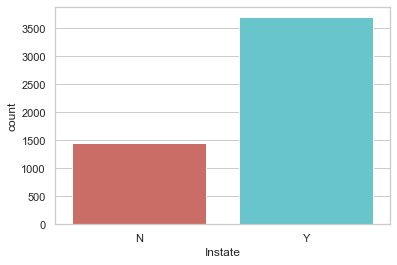

In [23]:
sns.countplot(x='Instate', data = data, palette = 'hls')

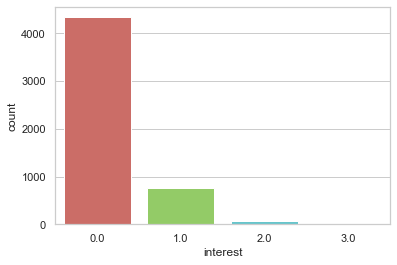

In [25]:
sns.countplot(x='interest', data = data, palette = 'hls')

In [27]:
data = data.drop(['LEVEL_YEAR'], axis = 1)

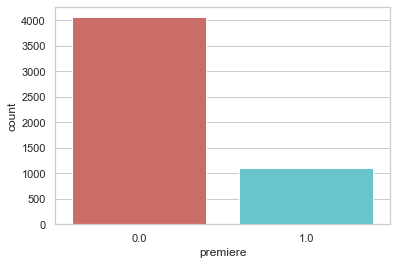

In [28]:
sns.countplot(x='premiere', data = data, palette = 'hls')

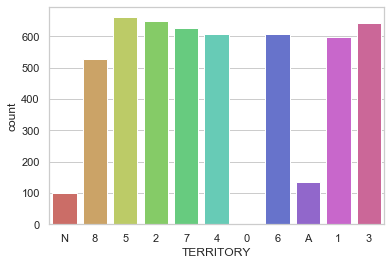

In [31]:
sns.countplot(x='TERRITORY', data = data, palette = 'hls')

In [32]:
data.groupby('TERRITORY').mean()

,avg_income,CAMPUS_VISIT,distance,hscrat,init_span,int1rat,int2rat,interest,mailq,premiere,REFERRAL_CNTCTS,satscore,SELF_INIT_CNTCTS,sex,SOLICITED_CNTCTS,telecq,TOTAL_CONTACTS,TRAVEL_INIT_CNTCTS
TERRITORY,,,,,,,,,,,,,,,,,,
0,44082.000000,0.000000,428.849367,0.000000,3.000000,0.012870,0.000000,0.000000,5.000000,0.000000,0.000000,NaN,1.000000,1.000000,0.000000,NaN,1.000000,0.000000
1,63704.467167,0.197655,101.502782,0.073595,18.489112,0.055504,0.063150,0.199330,3.800670,0.291457,0.043551,1149.263393,3.944724,0.621343,0.603015,2.019380,5.078727,0.487437
2,40982.120858,0.115562,418.660106,0.069265,20.835131,0.034466,0.039489,0.135593,4.160247,0.160247,0.084746,1152.135922,2.650231,0.631410,0.702619,2.268293,3.753467,0.315871
3,58199.447458,0.125776,158.812148,0.068870,18.405280,0.054896,0.062395,0.211180,3.732919,0.295031,0.057453,1134.917695,3.833851,0.606635,0.506211,2.174785,4.888199,0.490683
4,56909.377289,0.167763,267.036773,0.091486,19.333882,0.048382,0.054554,0.190789,3.822368,0.245066,0.046053,1160.168675,3.629934,0.629816,0.590461,2.128472,4.809211,0.542763
5,40264.935829,0.099849,460.648248,0.077062,19.508321,0.040717,0.045752,0.177005,3.947050,0.140696,0.045386,1145.603448,2.727685,0.619938,0.603631,2.190045,3.860817,0.484115
6,53818.969466,0.159539,137.466932,0.089586,18.912829,0.052067,0.058799,0.223684,3.830592,0.251645,0.100329,1142.268293,3.657895,0.596315,0.643092,2.082353,4.797697,0.396382
7,55231.864621,0.124204,419.817558,0.083919,19.464968,0.044844,0.052257,0.164013,4.007962,0.168790,0.073248,1155.549738,3.170382,0.623586,0.549363,2.133333,4.210191,0.417197
8,57588.668103,0.270321,398.082124,0.158832,19.357278,0.044006,0.050642,0.105860,3.654064,0.223062,0.086957,1160.049628,3.862004,0.606526,0.504726,2.124514,4.979206,0.525520


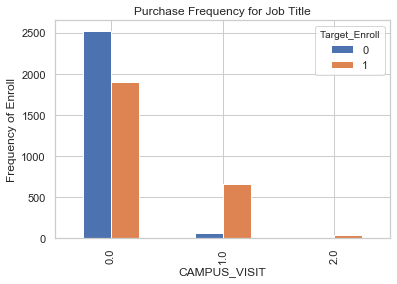

In [33]:
%matplotlib inline
pd.crosstab(data.CAMPUS_VISIT,data.Target_Enroll).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('CAMPUS_VISIT')
plt.ylabel('Frequency of Enroll')
plt.savefig('enroll vs campus visit')

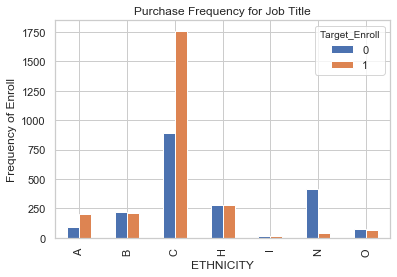

In [34]:
%matplotlib inline
pd.crosstab(data.ETHNICITY,data.Target_Enroll).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('ETHNICITY')
plt.ylabel('Frequency of Enroll')
plt.savefig('enroll vs ETHNICITY')

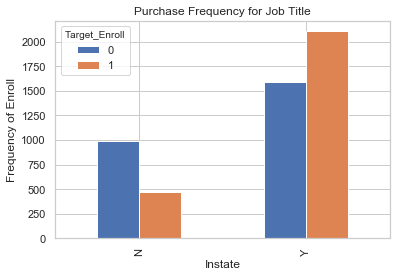

In [35]:
%matplotlib inline
pd.crosstab(data.Instate,data.Target_Enroll).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Instate')
plt.ylabel('Frequency of Enroll')
plt.savefig('enroll vs Instate')

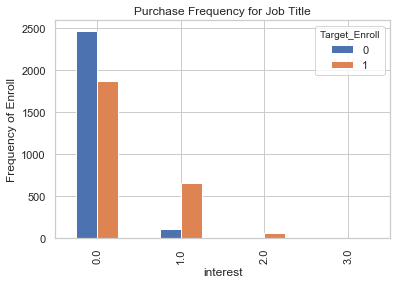

In [36]:
%matplotlib inline
pd.crosstab(data.interest,data.Target_Enroll).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('interest')
plt.ylabel('Frequency of Enroll')
plt.savefig('enroll vs interest')

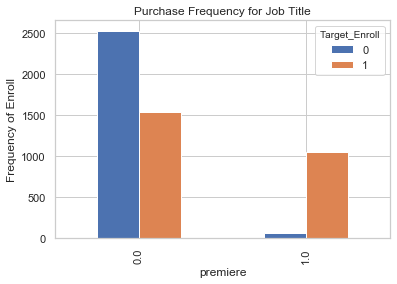

In [37]:
%matplotlib inline
pd.crosstab(data.premiere,data.Target_Enroll).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('premiere')
plt.ylabel('Frequency of Enroll')
plt.savefig('enroll vs premiere')  

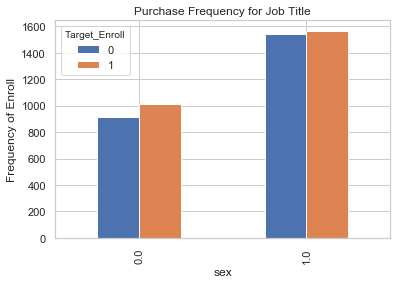

In [38]:
%matplotlib inline
pd.crosstab(data.sex,data.Target_Enroll).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('sex')
plt.ylabel('Frequency of Enroll')
plt.savefig('enroll vs sex')

In [43]:
cat_vars=['Instate','premiere']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Instate','premiere']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
print(to_keep)

['avg_income', 'CAMPUS_VISIT', 'CONTACT_CODE1', 'Contact_Date', 'Contact_Month', 'Contact_Year', 'distance', 'Target_Enroll', 'ETHNICITY', 'hscrat', 'ID', 'init_span', 'int1rat', 'int2rat', 'interest', 'mailq', 'REFERRAL_CNTCTS', 'satscore', 'SELF_INIT_CNTCTS', 'sex', 'SOLICITED_CNTCTS', 'telecq', 'TERRITORY', 'TOTAL_CONTACTS', 'TRAVEL_INIT_CNTCTS', 'sex_0.0', 'sex_1.0', 'Instate_N', 'Instate_Y', 'premiere_0.0', 'premiere_1.0']


In [45]:
data_final=data[to_keep]
data = data.drop(['sex'], axis = 1)

data_final.columns.values

array(['avg_income', 'CAMPUS_VISIT', 'CONTACT_CODE1', 'Contact_Date',
       'Contact_Month', 'Contact_Year', 'distance', 'Target_Enroll',
       'ETHNICITY', 'hscrat', 'ID', 'init_span', 'int1rat', 'int2rat',
       'interest', 'mailq', 'REFERRAL_CNTCTS', 'satscore',
       'SELF_INIT_CNTCTS', 'sex', 'SOLICITED_CNTCTS', 'telecq',
       'TERRITORY', 'TOTAL_CONTACTS', 'TRAVEL_INIT_CNTCTS', 'sex_0.0',
       'sex_1.0', 'Instate_N', 'Instate_Y', 'premiere_0.0',
       'premiere_1.0'], dtype=object)

In [48]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [54]:
data_final['Target_Enroll'].value_counts()

0    2580
1    2580
Name: Target_Enroll, dtype: int64

In [57]:
data_final.to_csv('~/Documents/fall2019/5753/enrollment_data.csv')

In [61]:
data_final = data_final.dropna()

In [62]:
data_final = data_final.drop(['CONTACT_CODE1'], axis = 1)

In [65]:
data_final = data_final.drop(['Contact_Month'], axis = 1)

In [71]:
data_final['ETHNICITY'].value_counts()


C    1187
H     160
A     141
B     127
N      45
O      36
I       6
Name: ETHNICITY, dtype: int64

In [72]:
data_final['TERRITORY'].value_counts()

3    290
4    245
1    220
8    214
6    214
7    194
5    165
2    144
A     16
Name: TERRITORY, dtype: int64

In [80]:
data_final['ETHNICITY']=np.where(data_final['ETHNICITY'] =='A', 1, data_final['ETHNICITY'])
data_final['ETHNICITY']=np.where(data_final['ETHNICITY'] =='B', 2, data_final['ETHNICITY'])
data_final['ETHNICITY']=np.where(data_final['ETHNICITY'] =='C', 3, data_final['ETHNICITY'])
data_final['ETHNICITY']=np.where(data_final['ETHNICITY'] =='H', 4, data_final['ETHNICITY'])
data_final['ETHNICITY']=np.where(data_final['ETHNICITY'] =='I', 5, data_final['ETHNICITY'])
data_final['ETHNICITY']=np.where(data_final['ETHNICITY'] =='O', 6, data_final['ETHNICITY'])
data_final['ETHNICITY']=np.where(data_final['ETHNICITY'] =='N', 7, data_final['ETHNICITY'])

In [81]:
data_final['TERRITORY']=np.where(data_final['TERRITORY'] =='A', 9, data_final['ETHNICITY'])

In [82]:
X = data_final.loc[:, data_final.columns != 'Target_Enroll']
y = data_final.loc[:, data_final.columns == 'Target_Enroll']

In [83]:
logreg = LogisticRegression()
# recursive feature elimination.
rfe = RFE(logreg, 20)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True  True False False  True  True  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True]
[9 1 4 7 6 1 1 8 2 1 1 1 1 1 5 3 1 1 1 1 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [97]:
cols = X.columns
print(cols)
cols_use = cols[rfe.support_].tolist()
print(cols_use)

Index(['avg_income', 'CAMPUS_VISIT', 'Contact_Date', 'Contact_Year',
       'distance', 'ETHNICITY', 'hscrat', 'ID', 'init_span', 'int1rat',
       'int2rat', 'interest', 'mailq', 'REFERRAL_CNTCTS', 'satscore',
       'SELF_INIT_CNTCTS', 'sex', 'SOLICITED_CNTCTS', 'telecq', 'TERRITORY',
       'TOTAL_CONTACTS', 'TRAVEL_INIT_CNTCTS', 'sex_0.0', 'sex_1.0',
       'Instate_N', 'Instate_Y', 'premiere_0.0', 'premiere_1.0'],
      dtype='object')
['CAMPUS_VISIT', 'ETHNICITY', 'hscrat', 'int1rat', 'int2rat', 'interest', 'mailq', 'REFERRAL_CNTCTS', 'sex', 'SOLICITED_CNTCTS', 'telecq', 'TERRITORY', 'TOTAL_CONTACTS', 'TRAVEL_INIT_CNTCTS', 'sex_0.0', 'sex_1.0', 'Instate_N', 'Instate_Y', 'premiere_0.0', 'premiere_1.0']


In [99]:
X = data_final[cols_use]
y = data_final['Target_Enroll']

In [102]:
print('length of X' + " "+ str(len(X)))
print('length of y' + " "+ str(len(y)))



length of X 1702
length of y 1702


In [104]:
y.head()

103    1
104    1
106    1
114    1
127    1
Name: Target_Enroll, dtype: object

In [106]:
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.259859
         Iterations 17
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.336     
Dependent Variable:   Target_Enroll    AIC:              916.5603  
Date:                 2019-10-19 13:35 BIC:              1003.5933 
No. Observations:     1702             Log-Likelihood:   -442.28   
Df Model:             15               LL-Null:          -666.58   
Df Residuals:         1686             LLR p-value:      4.0518e-86
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       17.0000                                      
-------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
CAMPUS_VISIT         1.2291   0.2900  4.2388 0.0000  0.6608  1.7974
ETHNICITY           -0.0918      nan    

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:1294: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [110]:
X = X.drop(['int1rat','interest','REFERRAL_CNTCTS','SOLICITED_CNTCTS','TRAVEL_INIT_CNTCTS'],axis = 1)

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [113]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix) 

[[ 16  34]
 [  3 458]]


In [114]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.32      0.46        50
           1       0.93      0.99      0.96       461

    accuracy                           0.93       511
   macro avg       0.89      0.66      0.71       511
weighted avg       0.92      0.93      0.91       511



In [119]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [134]:
for i in range(0,len(y_pred)):
    y_pred[i] = int(y_pred[i])

In [136]:
logit_roc_auc = roc_auc_score(y_test,y_pred)

In [165]:
y.value_counts()

1    1476
0     226
Name: Target_Enroll, dtype: int64

In [182]:
count_no_sub = len(data_final[data_final['Target_Enroll']=='0'])
count_sub = len(data_final[data_final['Target_Enroll']=='1'])

In [183]:
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 13.278495887191538
percentage of subscription 86.72150411280846


In [184]:
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1],pos_label='1')

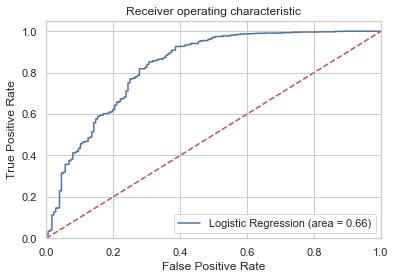

In [185]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()